We will work with $T = 2$, and discretize the interval $[0 ; 1]$. We will denote $t_{i} := i\frac{T}{n}$ with $i = 0,...,n $ 

# Question 1

In view of the approximation of $\int_{0}^{T} W_{s}dW_{s}$, we consider the three following quantities:

$I_{n} := \sum_{i=0}^{n-1} W_{t_{i}}(W_{t_{i+1}}-W_{t_{i}})$

$J_{n} := \sum_{i=0}^{n-1} W_{t_{i+1}}(W_{t_{i+1}}-W_{t_{i}})$

$K_{n} := \sum_{i=0}^{n-1} \frac{(W_{t_{i}} + W_{t_{i+1}})}{2}(W_{t_{i+1}}-W_{t_{i}})$

We will simulate 1000 copies of the random variables $\frac{1}{2}W_{T}^{2} - I_{n}$, $\frac{1}{2}W_{T}^{2} - J_{n}$, $\frac{1}{2}W_{T}^{2} - K_{n}$ and compute their mean respectively.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
def miseenplace (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n)) #Brownian increments
    w = np.cumsum(delta_w,axis=1) #Brownian paths
    w = w.T
    delta_w = delta_w.T
    delta_w.tolist()
    w.tolist()
    I = np.sum(np.multiply(np.array(w[:-1]).T,np.array(delta_w[1:]).T),axis = 1)
    J = np.sum(np.multiply(np.array(w[1:]).T,np.array(delta_w[1:]).T),axis = 1)
    K = (1/2)*(I+J)
    WT = np.array(w[-1])
    WTc = (1/2)*np.multiply(WT,WT)
    var1 = WTc - I 
    var2 = WTc - J
    var3 = WTc - K
    m1 = np.mean(var1) # means m
    m2 = np.mean(var2)
    m3 = np.mean(var3)
    et1 = np.std(var1) # standard deviation 
    et2 = np.std(var2)
    et3 = np.std(var3)
    return m1,m2,m3,et1,et2,et3

In [27]:
def compute_left(mu,sigma,M):
    #Intervalle de confiance, borne gauche
    i_left = norm.ppf(0.05)
    z_left = mu + (sigma/np.sqrt(M)) * i_left
    return z_left
def compute_right(mu,sigma,M):
    #intervalle de confiance, borne droite
    i_right = norm.ppf(0.95)
    z_right = mu + (sigma/np.sqrt(M)) * i_right
    return z_right
def rep(M,T,idd):
    #idd appartient à {1,2,3} et permet de choisir entre le calcul
    #avec I,J ou K
    left = []
    right = []
    moy = []    
    for n in range(10,21):
        res = miseenplace(n,M,T)
        mu = res[idd-1]
        moy.append(mu)
        sigma = res[idd+2]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,21),left,linewidth=.7, label='left bound')
    plt.plot(np.arange(10,21),right,linewidth=.7, label='right bound')
    plt.plot(np.arange(10,21),moy,linewidth=.7, label='mean')
    plt.xlabel("Different values of n (discretization parameter)")
    #plt.ylabel("")
    plt.title("Mean and bounds of the confidence intervals at 95%")
    plt.legend()

## Question 1.b

In [24]:
print(miseenplace (100,1000,2)[:3])

(0.9969472258754825, -0.9778357842235293, 0.00955572082597654)


We obtain the mean of the $M=1000$ copies of $\frac{1}{2}W_{T}^{2} - I_{n}$ close to $1$ (which is its expectation, since $E(W_{T}^{2}) = T = 2 $ and $E(I_{n}) = 0$


The mean of $\frac{1}{2}W_{T}^{2} - K_{n}$  is close to $-1$ which is its expectation. We have $I_{n} + J_{n} = \sum_{i=0}^{n-1}(W_{t_{i}}+W_{t_{i+1}})(W_{t_{i+1}}-W_{t_{i}}) = \sum_{i=0}^{n-1} W_{t_{i+1}}^{2} - W_{t_{i}}^{2} = W_{T}^{2}$

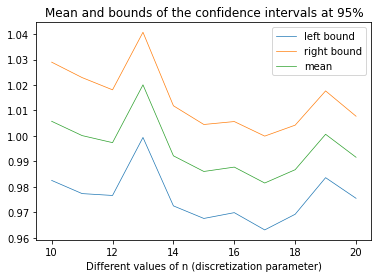

In [28]:
#M = 1000 copies
#T = 2 
rep(1000,2,1) #idd = 1 , les calculs se font avec I

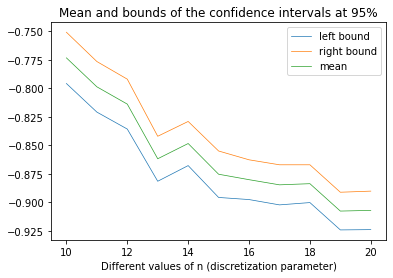

In [29]:
rep(1000,2,2) #idd = 2 , les calculs se font avec J

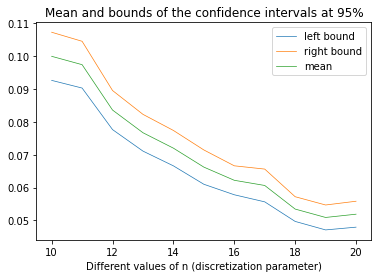

In [30]:
rep(1000,2,3) #idd = 3 , les calculs se font avec K

# Question 2

Same as question 1, but here we work with the integral $\int_{0}^{T}e^{t}dW_{t}$.

In [16]:
def miseenplace2 (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n))
    w = np.cumsum(delta_w,axis=1)
    #print("delta_w",delta_w)
    #print("w",w)
    t = [i*(T/n) for i in range(n+1)]
    et = np.exp(t)
    w = np.cumsum(delta_w,axis=1)
    interm_1 = np.multiply(delta_w,et[:-1])
    interm_2 = np.multiply(delta_w,et[1:])
    interm_3 = np.sqrt(np.multiply(interm_1,interm_2))
    A = np.sum(interm_1,axis = 1)
    B = np.sum(interm_2,axis = 1)
    C = np.sum(interm_3,axis = 1)
    WT = np.array((w.T)[-1])
    WTc = (1/2)*np.multiply(WT,WT)
    var1 = WTc - A
    var2 = WTc - B
    var3 = WTc - C
    m1 = np.mean(var1)
    m2 = np.mean(var2)
    m3 = np.mean(var3)
    ect1 = np.std(var1)
    ect2 = np.std(var2)
    ect3 = np.std(var3)
    return m1,m2,m3,ect1,ect2,ect3

In [31]:
def rep2(M,T,idd):
    left = []
    right = []
    moy = []    
    for n in range(10,51):
        res = miseenplace2(n,M,T)
        #print(res)
        mu = res[idd-1]
        moy.append(mu)
        sigma = res[idd+2]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,51),left,linewidth=.7, label='left bound')
    plt.xlabel
    plt.plot(np.arange(10,51),right,linewidth=.7, label='right bound')
    plt.plot(np.arange(10,51),moy,linewidth=.7, label='mean')
    plt.xlabel("Different values of n (discretization parameter)")
    plt.title("Mean and bounds of the confidence intervals")
    plt.legend()

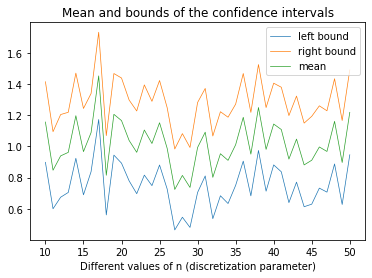

In [32]:
rep2(1000,2,1)

# 3

We now consider the random variables $A_{n} := sin(W_{T}) + \frac{1}{2n}\sum_{i=1}^{n} sin(W_{t_{i-1}})$

In [33]:
def miseenplace3 (n,M,T):
    delta_w = np.random.normal(0, np.sqrt(T/n), size = (M,n))
    w = np.cumsum(delta_w,axis=1)
    sin = np.sin(w)
    A = (1/(2*n))*np.sum(sin,axis = 1) + ((2*n-1)/(2*n))*((sin.T)[-1])
    m = np.mean(A)
    ec = np.std(A)
    return m,ec

In [36]:
def rep3(M,T):
    left = []
    right = []
    moy = []    
    for n in range(10,201):
        res = miseenplace3(n,M,T)
        mu = res[0]
        moy.append(mu)
        sigma = res[1]
        left.append(compute_left(mu,sigma,M))
        right.append(compute_right(mu,sigma,M))
    plt.plot(np.arange(10,201),left,linewidth=.7, label='left bound')
    plt.plot(np.arange(10,201),right,linewidth=.7, label='right bound')
    plt.plot(np.arange(10,201),moy,linewidth=.7, label='mean')
    plt.xlabel("Different values of n (discretization parameter)")
    plt.title("Mean and bounds of the confidence intervals")
    plt.legend()

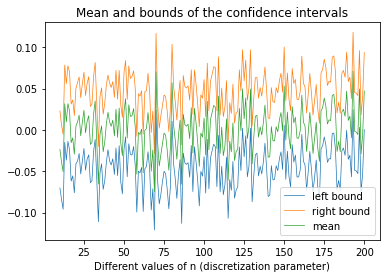

In [37]:
rep3(1000,2)

We have $E(A_{n}) = 0$

We can see that by noticing, since, for all time $t$, $W_{t} and -W_{t}$ follow the same probaility law, $sin(W_{t})$ and $sin(-W_{t})$ also follow the same law. Their expectations are then equal, which implies: $E(sin(W_{t})) = 0, ∀ t$